# 8章 数値シミュレーションで消費者行動を予測する10本ノック

ここでは、消費者行動が口コミなどの情報伝播によってどのように変化していくかを分析する、  
人間関係のネットワーク構造を用いた数値シミュレーション手法を中心に学んでいきます。

### ノック71：人間関係のネットワークを可視化してみよう

In [1]:
import pandas as pd

df_links = pd.read_csv("links.csv")
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


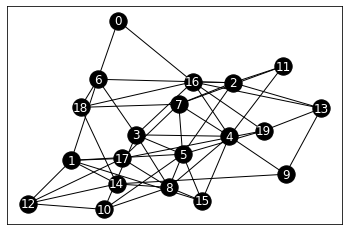

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
NUM = len(df_links.index)
for i in range(1,NUM+1):
    node_no = df_links.columns[i].strip("Node")
    #print(node_no)
    G.add_node(str(node_no))

# 辺の設定
for i in range(NUM):
    for j in range(NUM):
        #print(i,j)
        if df_links.iloc[i][j]==1:
            G.add_edge(str(i),str(j))
        
# 描画 
nx.draw_networkx(G,node_color="k", edge_color="k", font_color="w")
plt.show()

### ノック72：口コミによる情報伝播の様子を可視化してみよう

### ノック73：口コミ数の時系列変化をグラフ化してみよう

### ノック74：会員数の時系列変化をシミュレーションしてみよう

### ノック75：パラメータの全体像を相図を見ながら把握しよう

### ノック76：実データを読み込んでみよう

### ノック77：リンク数の分布を可視化しよう

### ノック78：シミュレーションのために実データからパラメータを推定しよう

### ノック79：実データとシミュレーションを比較しよう

### ノック80：シミュレーションによる将来予測を実施しよう